In [1]:
from keras import layers 
from keras import models 

2023-10-02 11:53:13.017149: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-02 11:53:13.842531: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-02 11:53:16.998325: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Network Initialization

In [2]:
model = models.Sequential() 

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2))) 

model.add(layers.Conv2D(64, (3,3), activation='relu')) 
model.add(layers.MaxPooling2D((2,2))) 

model.add(layers.Conv2D(128, (3,3), activation='relu')) 
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu')) 
model.add(layers.MaxPooling2D((2,2))) 

model.add(layers.Flatten()) 

model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [4]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy', 
            optimizer = optimizers.RMSprop(learning_rate = 1e-4), 
            metrics = ['acc'])

# Data Preprocessing

1. Read the picture files   
2. Convert the JPEG content to RGB format  
3. Convert the RGB grids into floating point tensors  
4. Normalize the pixel values between 0 & 1

In [5]:
from keras.preprocessing.image import ImageDataGenerator 

train_dir = "./Data/cats_and_dogs_small/train"
valid_dir = "./Data/cats_and_dogs_small/valid"

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (150,150), 
    batch_size = 20, 
    class_mode = 'binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir, 
    target_size = (150,150), 
    batch_size = 20, 
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print(f'Data Batch Shape: {data_batch.shape}')
    print(f'Labels Batch Shape: {data_batch.shape}')
    break

Data Batch Shape: (20, 150, 150, 3)
Labels Batch Shape: (20, 150, 150, 3)


# Model Fitting

In [7]:
history = model.fit(
    train_generator, 
    steps_per_epoch = 100, 
    epochs = 30, 
    validation_data = valid_generator, 
    validation_steps = 50
)

Epoch 1/30
100/100 [==============================] - 140s 1s/step - loss: 0.6907 - acc: 0.5465 - val_loss: 0.6790 - val_acc: 0.5950
Epoch 2/30
100/100 [==============================] - 96s 965ms/step - loss: 0.6723 - acc: 0.5795 - val_loss: 0.6684 - val_acc: 0.5610
Epoch 3/30
100/100 [==============================] - 96s 963ms/step - loss: 0.6479 - acc: 0.6305 - val_loss: 0.6536 - val_acc: 0.5990
Epoch 4/30
100/100 [==============================] - 97s 970ms/step - loss: 0.6079 - acc: 0.6660 - val_loss: 0.6422 - val_acc: 0.6010
Epoch 5/30
100/100 [==============================] - 94s 946ms/step - loss: 0.5759 - acc: 0.6965 - val_loss: 0.6121 - val_acc: 0.6520
Epoch 6/30
100/100 [==============================] - 94s 942ms/step - loss: 0.5508 - acc: 0.7145 - val_loss: 0.5858 - val_acc: 0.6900
Epoch 7/30
100/100 [==============================] - 96s 960ms/step - loss: 0.5279 - acc: 0.7420 - val_loss: 0.5843 - val_acc: 0.6850
Epoch 8/30
100/100 [==============================] - 96s

In [10]:
# Save the model
model.save('models/cats_and_dogs_small_1.keras')

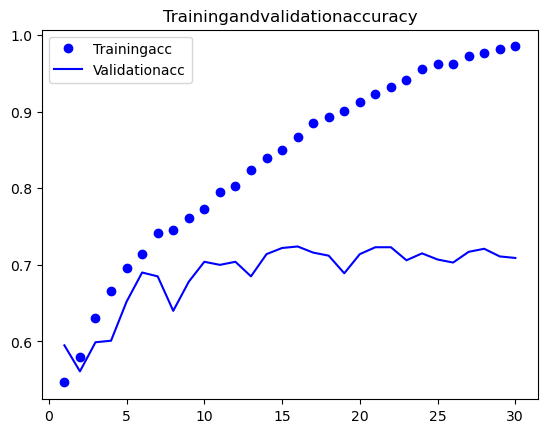

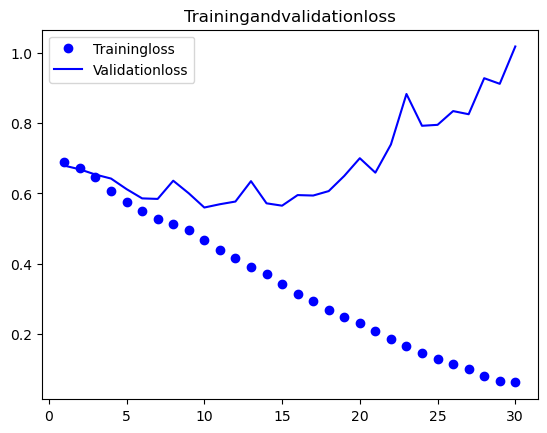

In [9]:
import matplotlib.pyplot as plt 

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs=range(1,len(acc)+1) 

plt.plot(epochs,acc,'bo',label='Trainingacc') 
plt.plot(epochs,val_acc,'b',label='Validationacc') 
plt.title('Trainingandvalidationaccuracy') 
plt.legend() 
plt.figure() 

plt.plot(epochs,loss,'bo',label='Trainingloss') 
plt.plot(epochs,val_loss,'b',label='Validationloss') 
plt.title('Trainingandvalidationloss') 
plt.legend() 
plt.show()